In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
temp = pd.read_csv('../Udacity Data Analyst/results.csv',index_col=0)

In [14]:
temp.head(10)

,city_temp,global_temp
year,,
1743,13.81,NaN
1744,16.98,NaN
1745,10.78,NaN
1746,NaN,NaN
1747,NaN,NaN
1748,NaN,NaN
1749,NaN,NaN
1750,16.52,8.72
1751,16.78,7.98


In [15]:
temp = temp.dropna()

In [16]:
temp['city_ma5'] = temp['city_temp'].rolling(5).mean()
temp['global_ma5'] = temp['global_temp'].rolling(5).mean()

In [17]:
temp.head(10)

,city_temp,global_temp,city_ma5,global_ma5
year,,,,
1750,16.52,8.72,NaN,NaN
1751,16.78,7.98,NaN,NaN
1752,13.09,5.78,NaN,NaN
1753,16.17,8.39,NaN,NaN
1754,16.09,8.47,15.730,7.868
1755,15.80,8.36,15.586,7.796
1756,16.11,8.85,15.452,7.970
1757,15.88,9.02,16.010,8.618
1758,15.04,6.74,15.784,8.288


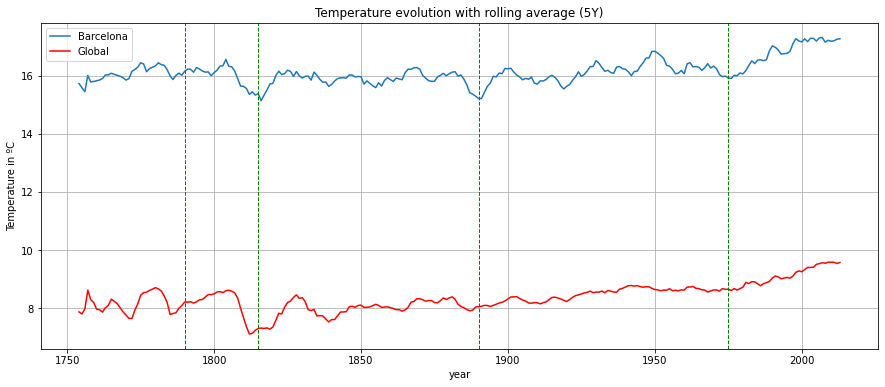

In [26]:
plt.figure(figsize=(15, 6))
temp['city_ma5'].plot(label='Barcelona')
temp['global_ma5'].plot(label='Global', color='red')
plt.axvline(x=1815, linewidth=1, color='green', linestyle='dashed')
plt.axvline(x=1790, linewidth=1, color='green', linestyle='dashed')
plt.axvline(x=1890, linewidth=1, color='green', linestyle='dashed')
plt.axvline(x=1975, linewidth=1, color='green', linestyle='dashed')
plt.ylabel('Temperature in ºC')
plt.title('Temperature evolution with rolling average (5Y)')
plt.grid()
plt.legend()
plt.show()

In [27]:
temp.loc[[1754,2013],"city_ma5"]

year
1754    15.730
2013    17.274
Name: city_ma5, dtype: float64

In [28]:
temp.loc[2013,'city_ma5'] - temp.loc[1754,'city_ma5']

1.5440000000000076

In [29]:
temp.loc[[1754,2013],"global_ma5"]

year
1754    7.868
2013    9.570
Name: global_ma5, dtype: float64

In [30]:
temp.loc[2013,'global_ma5'] - temp.loc[1754,'global_ma5']

1.7019999999999964

In [31]:
temp['ma_diff'] = abs(temp['global_ma5']-temp['city_ma5'])
temp.head(100)

,city_temp,global_temp,city_ma5,global_ma5,ma_diff
year,,,,,
1750,16.52,8.72,NaN,NaN,NaN
1751,16.78,7.98,NaN,NaN,NaN
1752,13.09,5.78,NaN,NaN,NaN
1753,16.17,8.39,NaN,NaN,NaN
1754,16.09,8.47,15.730,7.868,7.862
...,...,...,...,...,...
1845,15.70,7.85,15.916,7.876,8.040
1846,16.64,8.55,16.030,8.048,7.982
1847,15.84,8.09,16.022,8.062,7.960


In [32]:
np.mean(temp.ma_diff)

7.781246153846162

In [33]:
max(temp.ma_diff.loc[1754:]), min(temp.ma_diff.loc[1754:])

(8.508000000000003, 7.154000000000007)

In [34]:
temp.corr()

,city_temp,global_temp,city_ma5,global_ma5,ma_diff
city_temp,1.000000,0.693804,0.761725,0.627080,0.107639
global_temp,0.693804,1.000000,0.749217,0.849099,-0.326547
city_ma5,0.761725,0.749217,1.000000,0.845151,0.100520
global_ma5,0.627080,0.849099,0.845151,1.000000,-0.446866
ma_diff,0.107639,-0.326547,0.100520,-0.446866,1.000000
